In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

with open('/content/drive/MyDrive/Colab Notebooks/ML/sinais de transito/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/drive/MyDrive/Colab Notebooks/ML/sinais de transito/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open('/content/drive/MyDrive/Colab Notebooks/ML/sinais de transito/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)

Mounted at /content/drive


In [2]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [3]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

print(x_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [4]:
print("QTD exemplos para treinamento = ", len(x_train))
print("QTD exemplos para validação = ", len(x_validation))
print("QTD exemplos para teste = ", len(x_test))
print("Formato imagem = ", x_train[0].shape)

unique_classes, n_samples = np.unique(y_train, return_index=False, return_inverse=False, return_counts=True)
n_classes = len(unique_classes)
print("Número de classes:", n_classes)

QTD exemplos para treinamento =  34799
QTD exemplos para validação =  4410
QTD exemplos para teste =  12630
Formato imagem =  (32, 32, 3)
Número de classes: 43


In [5]:
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/sinais de transito/signnames.csv")
print(labels)
label_signs = labels.values[:,1]

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

[[[190 187 192]
  [191 192 198]
  [192 197 203]
  ...
  [109 126 141]
  [129 140 162]
  [109 120 147]]

 [[188 188 191]
  [189 192 196]
  [191 198 203]
  ...
  [115 130 145]
  [135 145 167]
  [112 123 150]]

 [[183 185 188]
  [185 191 194]
  [187 197 202]
  ...
  [119 132 148]
  [139 148 171]
  [116 126 155]]

 ...

 [[ 38  38  31]
  [ 43  40  34]
  [ 49  45  42]
  ...
  [116  54  41]
  [117  54  40]
  [117  54  40]]

 [[ 35  35  29]
  [ 40  37  30]
  [ 49  43  39]
  ...
  [ 66  37  32]
  [ 66  36  32]
  [ 66  35  31]]

 [[ 34  34  28]
  [ 39  35  28]
  [ 49  41  35]
  ...
  [ 20  20  18]
  [ 18  18  16]
  [ 17  17  15]]]
34
Turn left ahead


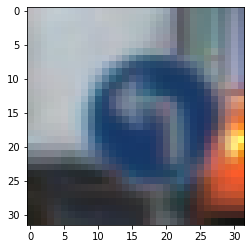

In [6]:
i = 2000
plt.imshow(x_test[i])
print(x_test[i])
print(y_test[i])
print(label_signs[y_test[i]])

36
Go straight or right


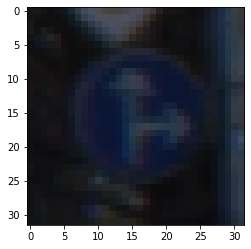

In [7]:
i = 1001
plt.imshow(x_train[i])
print(y_train[i])
print(label_signs[y_train[i]])

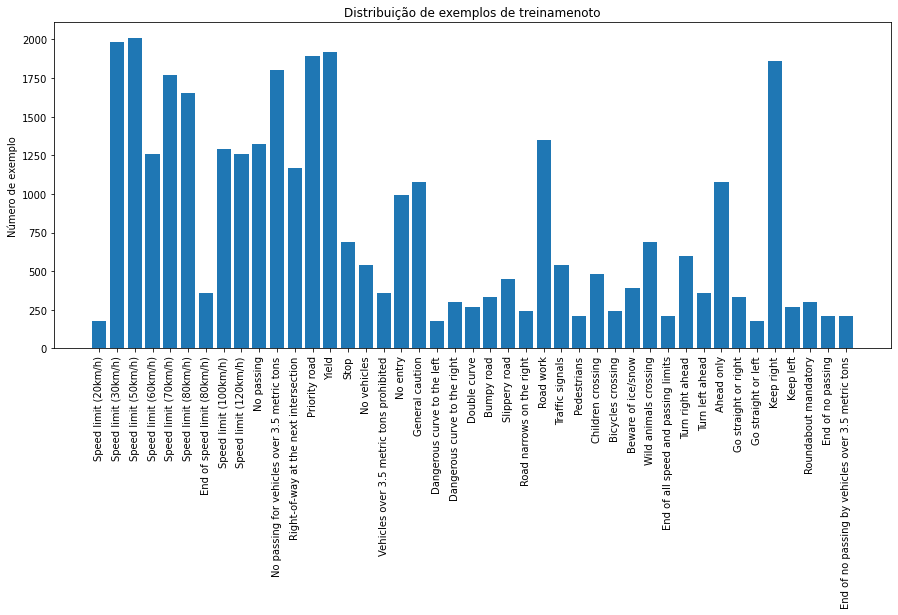

In [8]:
labels_unique=[]
for i in range(n_classes):
  labels_unique.append(label_signs[i])

index = random.randint(0,len(x_train))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.set_title("Distribuição de exemplos de treinamenoto")
ax.set_xticks(np.arange(len(labels_unique)))
ax.set_xticklabels(labels_unique, rotation='vertical')
ax.set_ylabel("Número de exemplo")
plt.bar(range(n_classes), n_samples)
plt.show()

In [9]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

#normaliza: o valor de cada pixel ficará entre -1, 1
x_train_gray_norm = (x_train_gray -128)/128
x_test_gray_norm = (x_test_gray -128)/128
x_validation_gray_norm = (x_validation_gray -128)/128

x_train_gray.shape

(34799, 32, 32, 1)

<Figure size 432x288 with 0 Axes>

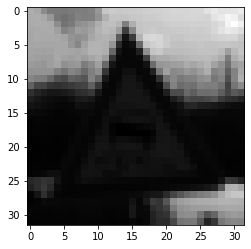

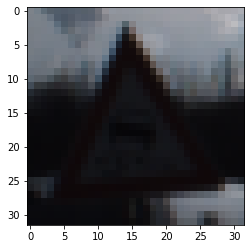

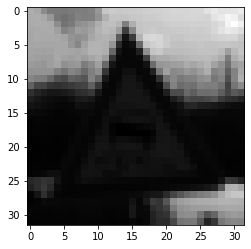

<Figure size 432x288 with 0 Axes>

In [10]:
i = 610
# função squeeze é usada quando queremos remover entradas unidimensionais da forma de um array
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])# 32x32x3
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()


In [11]:
#treinamento de modelo

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
print(x_train_gray[i].shape)

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = cnn_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data=(x_validation_gray_norm, y_validation))

(32, 32, 1)
Epoch 1/50
70/70 [==============================] - 12s 11ms/step - loss: 3.1451 - accuracy: 0.1858 - val_loss: 2.7416 - val_accuracy: 0.3091
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 1.6769 - accuracy: 0.5407 - val_loss: 1.5008 - val_accuracy: 0.5562
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.9795 - accuracy: 0.7161 - val_loss: 1.0806 - val_accuracy: 0.6771
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.7132 - accuracy: 0.7944 - val_loss: 0.9293 - val_accuracy: 0.7220
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.8470 - val_loss: 0.8216 - val_accuracy: 0.7567
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4764 - accuracy: 0.8670 - val_loss: 0.7624 - val_accuracy: 0.7737
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8941 - val_loss: 0.7250 - val_accuracy: 0.7875
Epoch 

In [12]:
score = cnn_model.evaluate(x_test_gray_norm, y_test, verbose=0)
print('Avaliação da acurácia: {:.4f}'.format(score[1]))

Avaliação da acurácia: 0.8515


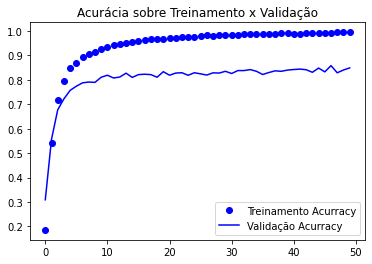

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Treinamento Acurracy')
plt.plot(epochs, val_accuracy, 'b', label='Validação Acurracy')
plt.title('Acurácia sobre Treinamento x Validação')
plt.legend()

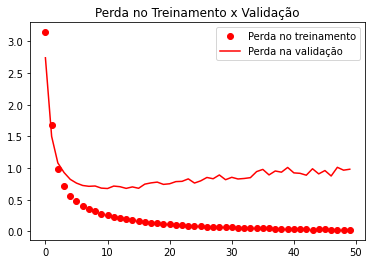

In [14]:
plt.plot(epochs, loss, 'ro', label='Perda no treinamento')
plt.plot(epochs, val_loss, 'r', label='Perda na validação')
plt.title('Perda no Treinamento x Validação')
plt.legend()
plt.show()

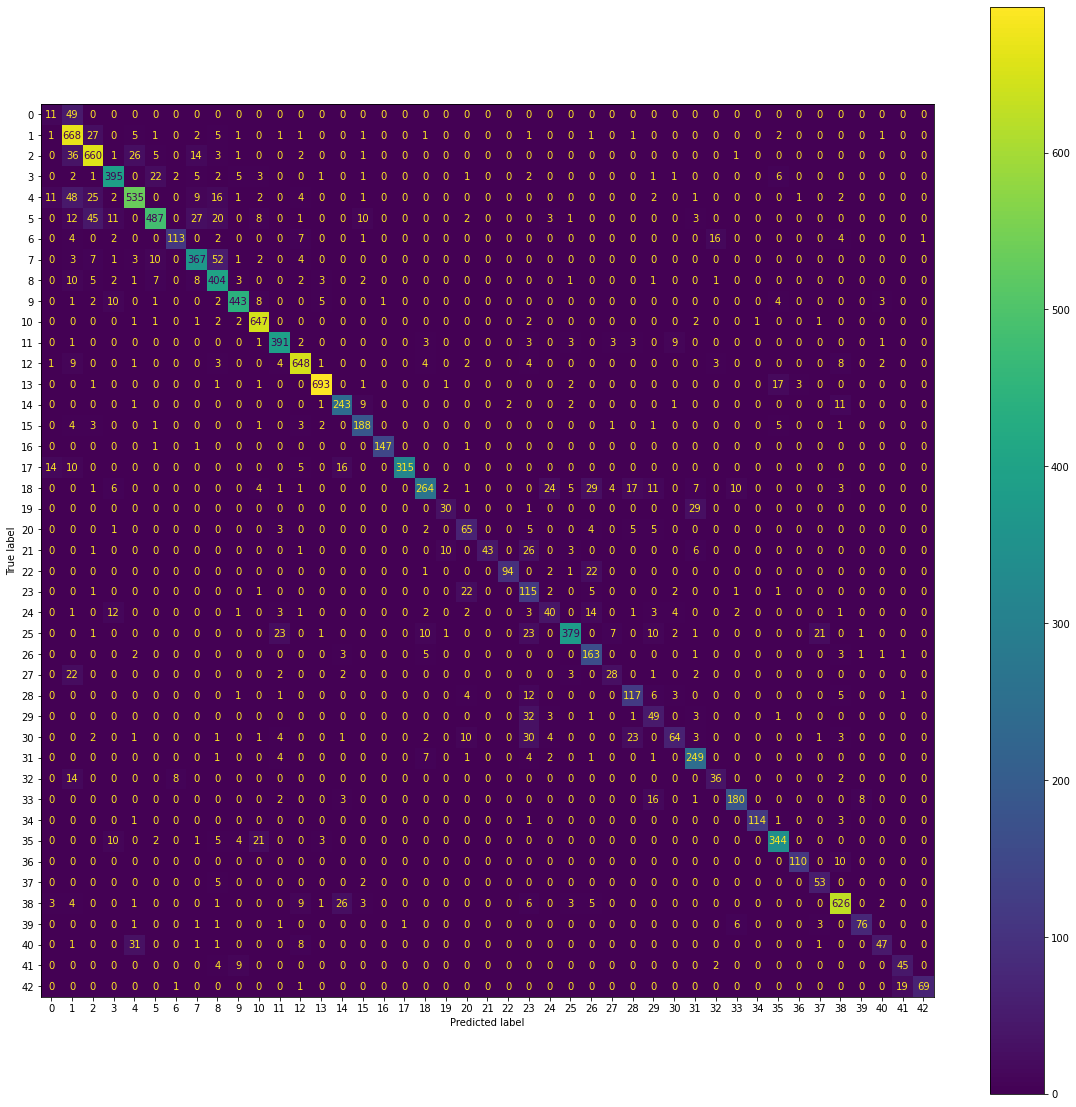

In [15]:
#Teste
#vamos a predição a base de teste 
predict_y = cnn_model.predict(x_test_gray_norm)
predicted_classes = np.argmax(predict_y, axis=1)

#indices a serem plotados
y_true = y_test

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true, predicted_classes))
fig, ax = plt.subplots(figsize=(20,20))
cmd.plot(ax=ax)

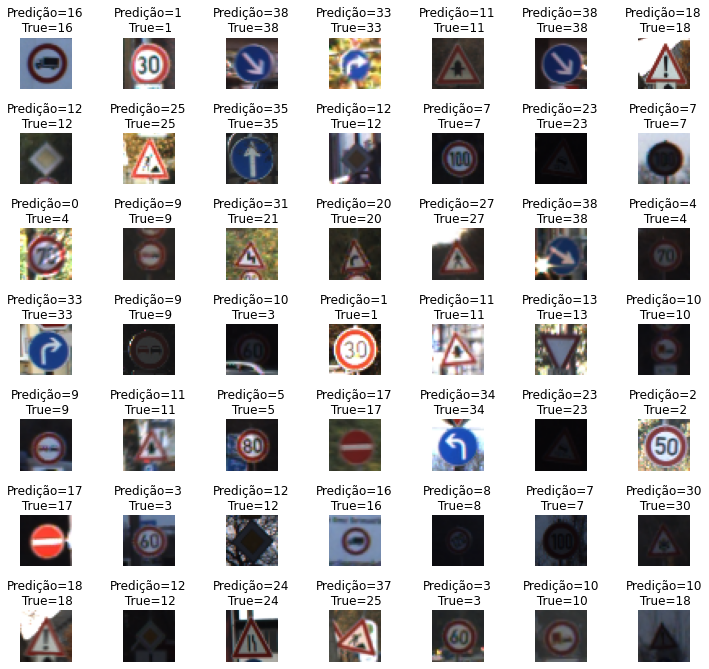

In [16]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Predição={}\n True={}".format(predicted_classes[i], y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)